In [291]:
library(tidyverse)

Let's use the code provided below to generate a dataset representing two populations, each sampled from a Guassian with a specific population mean. Here I am generating only 5 samples

In [292]:
set.seed(110)
data_1 = tibble(measure=rnorm(5, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(5, 12, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)
complete_data

measure,site_name
<dbl>,<chr>
10.29120,Site 1
11.38886,Site 1
10.64901,Site 1
11.47788,Site 1
10.43872,Site 1
12.52232,Site 2
11.95539,Site 2
13.48441,Site 2
10.40899,Site 2


* I compute the mean of the dataset above using the following code:
  * feel free to deconstruct the code to see what each chunk does.


In [293]:
mean(complete_data[complete_data$site_name == "Site 1", ]$measure)
mean(complete_data[complete_data$site_name == "Site 2", ]$measure)

[1] 10.84913

[1] 12.11935

* Use the `tapply` function instead of the code above to compute the means samples from "Site 1" and those from site 2
  * See tapply for help if needed.

In [294]:
# Write your code here
measure <- complete_data$measure
site_name <- complete_data$site_name
mean_sites <- tapply(measure, site_name, mean)
mean_sites


Site 1   Site 2 
10.84913 12.11935

Q.2 

* Use the bootstrapping-procedure covered in class to assess whether there is a statistically significant difference between the data in `Site 1` and that in `Site 2`.

Make sure you follow the approach discussed in class and which consists of:

1. Selecting an appropriate test statistic
2. Bootstrapping a a distribuion for the observed statistic under the null hypothesis
3. Desciding whether to accept or reject the null based on the probability of the null
4. provide a p-value to support your decision.


In [295]:
set.seed(110)
data_1 = tibble(measure=rnorm(40, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(40, 13, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)
head(complete_data)

measure,site_name
<dbl>,<chr>
10.29120,Site 1
11.38886,Site 1
10.64901,Site 1
11.47788,Site 1
10.43872,Site 1
10.52232,Site 1


In [296]:
measure <- complete_data$measure
site_name <- complete_data$site_name
ttest <- tapply(measure, site_name, t.test)
ttest

$`Site 1`

	One Sample t-test

data:  X[[i]]
t = 61.206, df = 39, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
  9.814368 10.485216
sample estimates:
mean of x 
 10.14979 


$`Site 2`

	One Sample t-test

data:  X[[i]]
t = 96.392, df = 39, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 12.43703 12.97017
sample estimates:
mean of x 
  12.7036 



In [297]:
mean_sites <- tapply(measure, site_name, mean)
test_stat <- abs(mean_sites[["Site 1"]] - mean_sites[["Site 2"]])
test_stat

[1] 2.553808

#### Q2.0 

Complete the following by describing the null and the alternative hypotheses we are testing here.


### Write your answer here
The Null Hypothesis: there is no difference between the mean value measured in site 1 and the mean value measured in site 2

Alternative Hypothesis: There is a statistically significant difference between the mean measured in site 1 vs the mean measured in site 2.

#### Q.2.1 

Produce a graph similar the one below (geom_density) display the distributions. If you're using the same seed as mine, your graph will look exactly the same as the one below 

![](https://www.dropbox.com/s/rz5jxm84kk8ac1m/dist.png?dl=1)

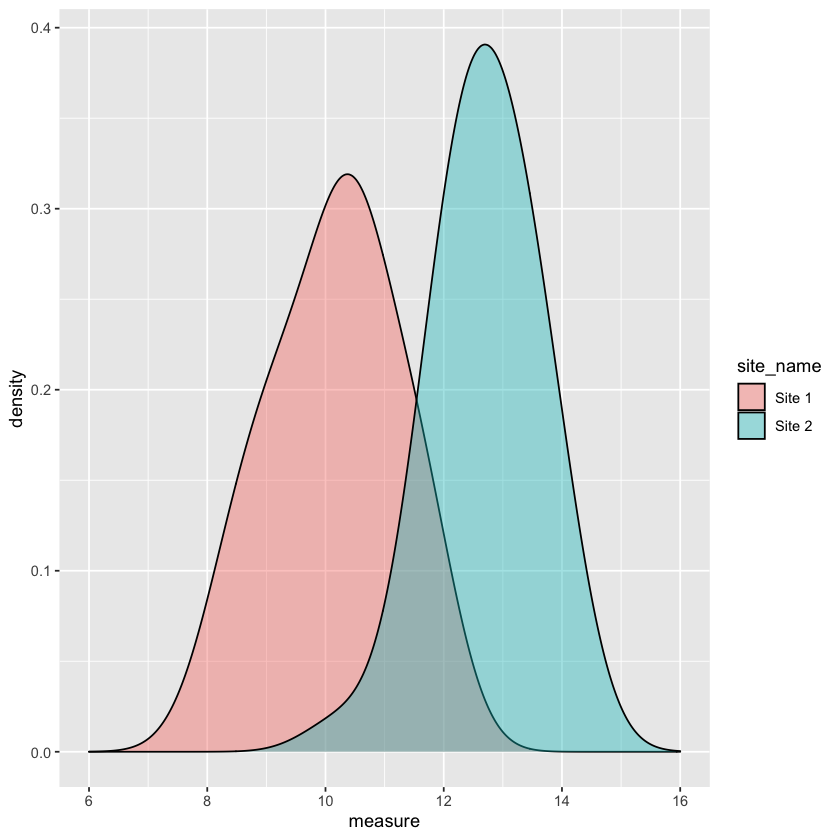

In [298]:
# write your code here
ggplot(complete_data, aes(x=measure, fill=site_name)) + 
geom_density(alpha = 0.4, bw=0.6) +
xlim(6, 16)

Q2.2 Select a proper test statistic and produce a distribution of the statistic under the null hypothesis. Plot the data as both a histogram and density curves. Your graph may look like this.

![](https://www.dropbox.com/s/3jarqg9swneai0r/mean_under_null.png?dl=1)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-1.361458 -0.244975 -0.006604 -0.004096  0.239752  1.377314 

[1] -0.004095741

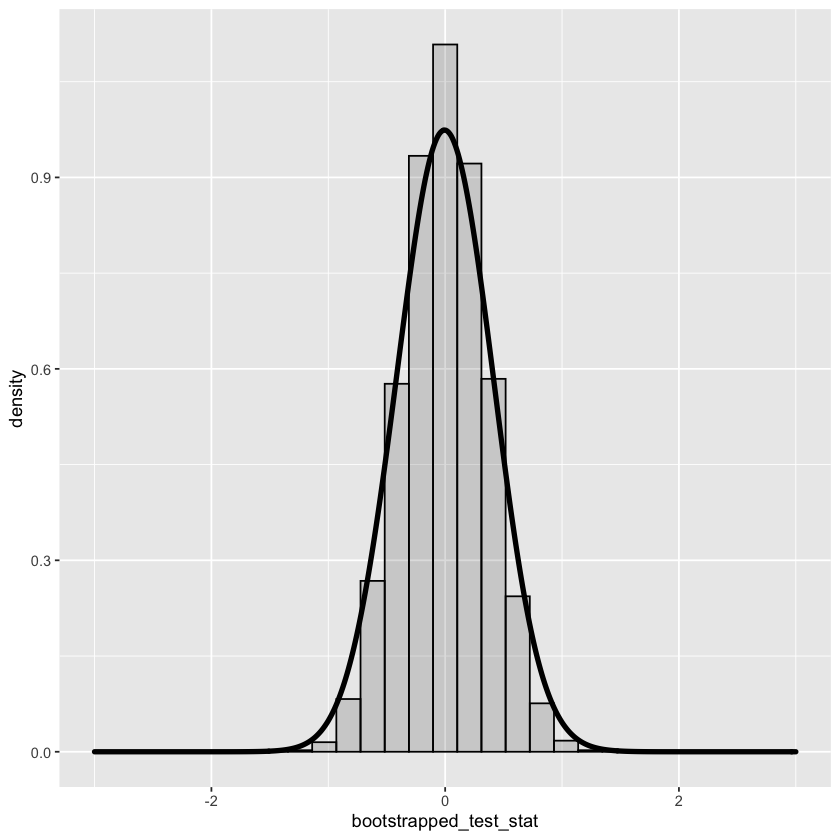

In [299]:
# Write your code here

n_sample <- 10000

bootstrapped_test_stat <- rep(NA, n_sample)

for(i in 1:n_sample){
    
    both_sites = complete_data$measure
    both_sites_shuffled = sample(both_sites)
    
    fake_site_1 = both_sites_shuffled[1:40]
    fake_site_2 = both_sites_shuffled[41:length(both_sites)]
    
    bootstrapped_test_stat[i] <- mean(fake_site_1) - mean(fake_site_2)
}

summary(bootstrapped_test_stat)
mean(bootstrapped_test_stat)

ggplot()+
  geom_histogram(aes(bootstrapped_test_stat, y=..density..), bins =30, alpha=0.2, color="black") + 
  geom_density(aes(bootstrapped_test_stat), bw=0.2, size=1.5) + 
  xlim(-3, 3)

####  Q2.3. 

Calculate and plot the observed statistic on the graph you created in Q.2.2. 


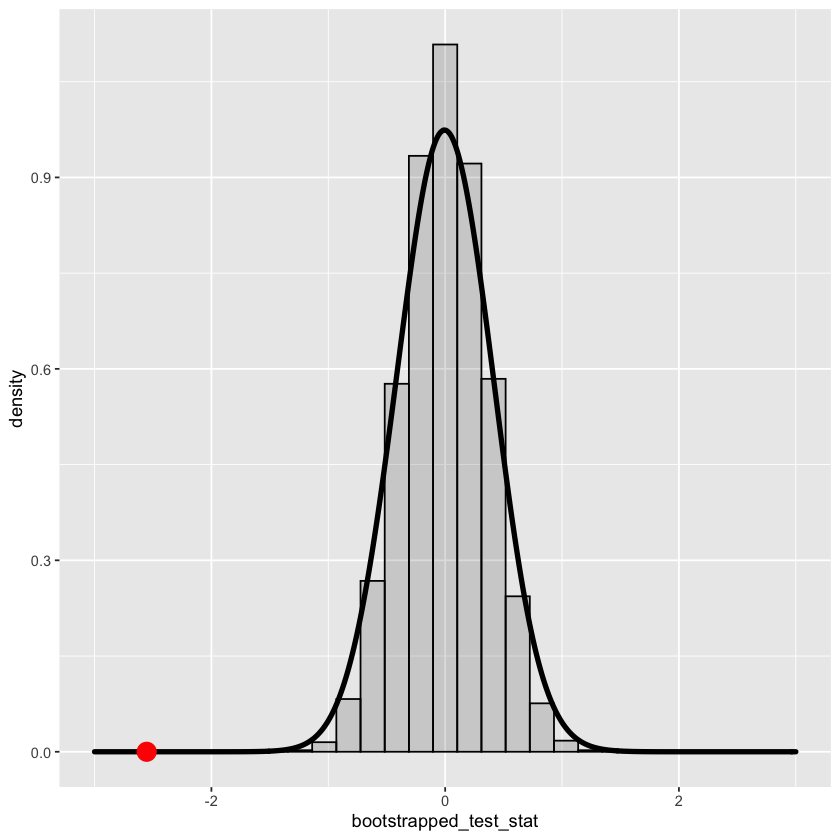

In [300]:
ggplot()+
  geom_histogram(aes(bootstrapped_test_stat, y=..density..), bins =30, alpha=0.2, color="black") + 
  geom_density(aes(bootstrapped_test_stat), bw=0.2, size=1.5) + 
  xlim(-3, 3)+
    geom_point(aes(mean(data_1$measure)-mean(data_2$measure), 0), size=5, color = "red")


#### Q2.4 
compute the p-vlaue of the observed statistic under the null. What do you conclude about the hypotheses you enunciated in Q


In [301]:
t.test(data_1$measure, data_2$measure, )$p.value < 0.5
# P value is under 0.5, so we reject the null hypothesis. 
#It seems like there is a statistically significant difference between the means

[1] TRUE

#### Q.3 

* The proportion of the of _P. lobata_, _M. capitata_ and _P. mendrina_ at a site X are c(0.60, 0.19, 0.21).
* You surveyed site Y with different environmental conditions and obtains the following proportions for the three corals (0.61, 0.19, 0.20). Use the multinomial non-parametric hypotheses test to assess whether the proportions obtained at sites X and Y are statistically different.


Although not explicitly required, your test should cover all the steps in Q2, i.e. appropriate graph(s) when possible, test statistics, and conclusion.

In [302]:
name <- c("P_lobata", "P_lobata", "M_capitata", "M_capitata", "P_mendrina", "P_mendrina")
site <- rep(c("X","Y"),3)
value <- c(0.6, 0.61, 0.19, 0.19, 0.21, 0.20)

data <- tibble(name, site, value)

In [303]:
data

name,site,value
<chr>,<chr>,<dbl>
P_lobata,X,0.60
P_lobata,Y,0.61
M_capitata,X,0.19
M_capitata,Y,0.19
P_mendrina,X,0.21
P_mendrina,Y,0.20


In [304]:
diff <- 0
for(n in unique(data$name)){
    
    species_values <- data[data$name == n, ]$value
    diff <- diff + abs(species_values[1] - species_values[2])
}
diff/2

[1] 0.01

In [305]:
n_times = 10000
tvd_array <- rep(NA, n_times)

known_values = c(0.6, 0.19, 0.21)

for (i in 1:n_times) {
    found_values <- rmultinom(1, 200, known_values)/200
    found_tvd <- sum(abs(known_values - found_values))/2
    tvd_array[i] <- found_tvd
}

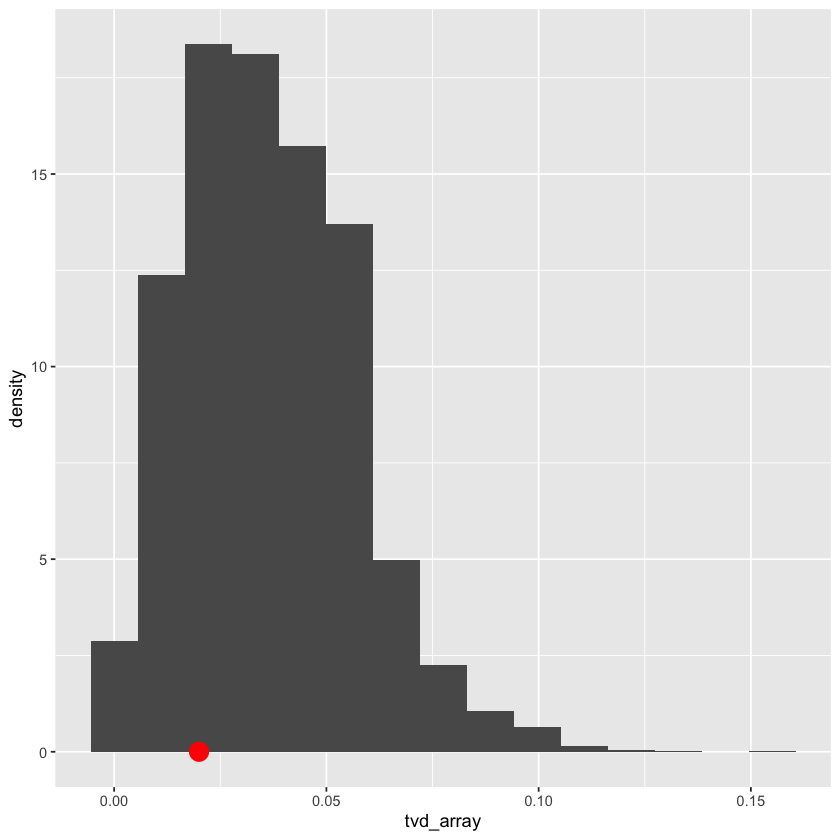

In [306]:
ggplot()+ 
     geom_histogram(aes(tvd_array, ..density..), bins = 15) +
     geom_point(aes(diff, 0), size=5, color="red")

In [307]:
p_value = sum(tvd_array > diff)  / length(tvd_array)
p_value
# p value is > 0.05 (very high) so we cannot reject Null Hypothesis 
# which suggests there is no statistically significant difference between the 
# proportions in sites X and Y

[1] 0.8151